# Análisis exploratorio de la Oferta

* Explorar características de los prestadores:
  1. Que tipo de prestadores.Ejemplo :Clinico,Cardiologo...etc
  2. Que tipo de atencion realizo. Ejemplo: Online, presencial
  3. Ver la relacion entre las calificaciones obtenidas por especialidad
* Explorar consumos. Analizar su distribución
  1. Ver la relacion entre los consumos por Especialidad
  

In [1]:
import io
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
import pandas_profiling


In [2]:
df_1=pd.read_csv('.\Data\Dataset_oferta.csv',sep=';')
df_1.head(5)


,id_prestador_encoded,especialidad_prestador_encoded,descripcion_practica_encoded,Q consumos,Promedio calificacion recibida
0,200030,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2
1,200123,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3
2,200133,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3
3,200137,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2
4,200167,CLINICA MEDICA,ATENCION ON LINE COVID19,1,1


In [3]:
df.info()
print('Numero de filas,columans',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_prestador_encoded            196 non-null    int64 
 1   especialidad_prestador_encoded  196 non-null    object
 2   descripcion_practica_encoded    196 non-null    object
 3   Q consumos                      196 non-null    int64 
 4   Promedio calificacion recibida  196 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.8+ KB
Numero de filas,columans (196, 5)


In [4]:
df['Promedio calificacion recibida'] = df['Promedio calificacion recibida'].replace(',','.', regex=True).astype(float)

In [5]:
df.info()
print('Numero de filas,columans',df.shape)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_prestador_encoded            196 non-null    int64  
 1   especialidad_prestador_encoded  196 non-null    object 
 2   descripcion_practica_encoded    196 non-null    object 
 3   Q consumos                      196 non-null    int64  
 4   Promedio calificacion recibida  196 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.8+ KB
Numero de filas,columans (196, 5)


,id_prestador_encoded,especialidad_prestador_encoded,descripcion_practica_encoded,Q consumos,Promedio calificacion recibida
0,200030,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2.0
1,200123,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3.0
2,200133,CLINICA MEDICA,ATENCION ON LINE COVID19,1,3.0
3,200137,CLINICA MEDICA,ATENCION ON LINE COVID19,1,2.0
4,200167,CLINICA MEDICA,ATENCION ON LINE COVID19,1,1.0


In [6]:
df.describe()

,id_prestador_encoded,Q consumos,Promedio calificacion recibida
count,196.00000,196.000000,196.000000
mean,200097.50000,12.755102,4.145958
std,56.72448,16.324945,2.603166
min,200000.00000,1.000000,1.000000
25%,200048.75000,3.000000,2.000000
50%,200097.50000,7.000000,4.215909
75%,200146.25000,17.000000,4.600000
max,200195.00000,101.000000,9.206897


In [7]:
import matplotlib
pandas_profiling.ProfileReport(df_1)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.isnull().sum()

id_prestador_encoded              0
especialidad_prestador_encoded    0
descripcion_practica_encoded      0
Q consumos                        0
Promedio calificacion recibida    0
dtype: int64

## Explorar características de los prestadores:
  1. Que tipo de prestadores: Clinico,Nutricionista,Pediatra
      * Se observa que existen un mayor numero de medicos pediatras por lo que hay un desequilibrio en la cantidad de oferentes por especilidad medica
  2. Distribucion de las calificaciones segun Especialidad.
      * Rango de calificacion: 1.00 - 9.20
      * La mayoria de los promedios ronda entre entre un puntaje 4.0 - 5.0, esto nos indica que hay que pensar en mejorar la calidad del servicio que se presta
      * Los medicos pediatras obtuvieron los promedios mas bajos, esto nos indica que si se quire mejorar la calidad de sercicio, el primer paso seria enfocarse y preguntarse porque esta especilialidad obtiene puntajes bajos.

    
  

C:\Users\silvi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


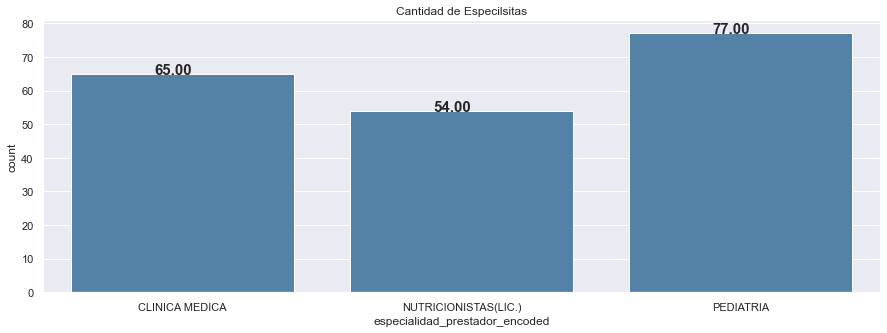

<Figure size 432x288 with 0 Axes>

In [20]:
# Ver los tipos de especialistas
plt.figure(figsize=(15,5))
ax=sns.countplot(df.especialidad_prestador_encoded, color='steelblue')
plt.title("Cantidad de Especilsitas")
sns.set(style="darkgrid")
for p in ax.patches:
    valores='{:,.2f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.5
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=15,weight='bold')

plt.show()
plt.savefig('filename.png')

In [10]:
# Ver por especialidad que tipo de atencion realizo
pd.crosstab(df.descripcion_practica_encoded , df.especialidad_prestador_encoded)

especialidad_prestador_encoded,CLINICA MEDICA,NUTRICIONISTAS(LIC.),PEDIATRIA
descripcion_practica_encoded,,,
ATENCION ON LINE COVID19,65,54,77


In [11]:
pd.DataFrame(df['Promedio calificacion recibida'].describe())

,Promedio calificacion recibida
count,196.000000
mean,4.145958
std,2.603166
min,1.000000
25%,2.000000
50%,4.215909
75%,4.600000
max,9.206897


<Figure size 720x360 with 0 Axes>

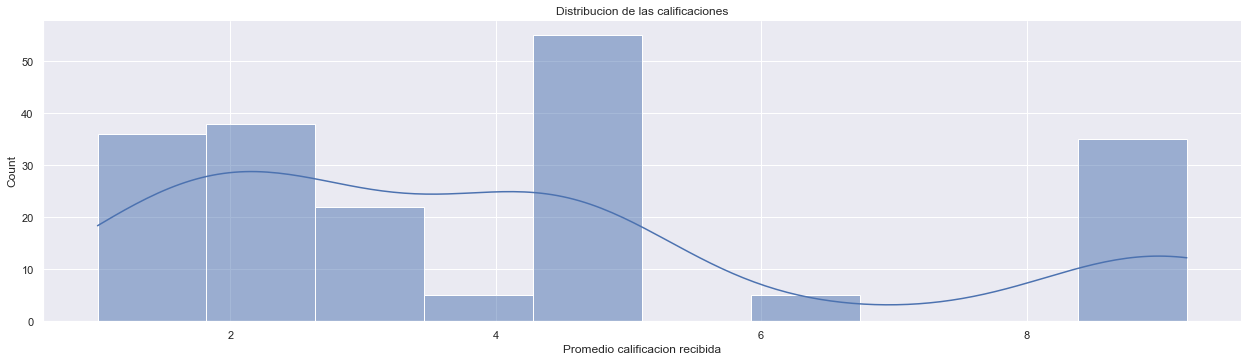

In [23]:
plt.figure(figsize=(10,5))
g =sns.displot(df, x="Promedio calificacion recibida", aspect=3.5, kde=True)
plt.title("Distribucion de las calificaciones")
plt.savefig('filename_2.png')


ver relacion entre  las calificaciones segun Especialidad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df['Promedio calificacion recibida'], y=df.especialidad_prestador_encoded)
plt.title('Calificaciones por Especilaidad', size=16)
plt.xlabel('Promedio calificacion recibida', size=14)
plt.ylabel('Especilidad_Medica', size=14)

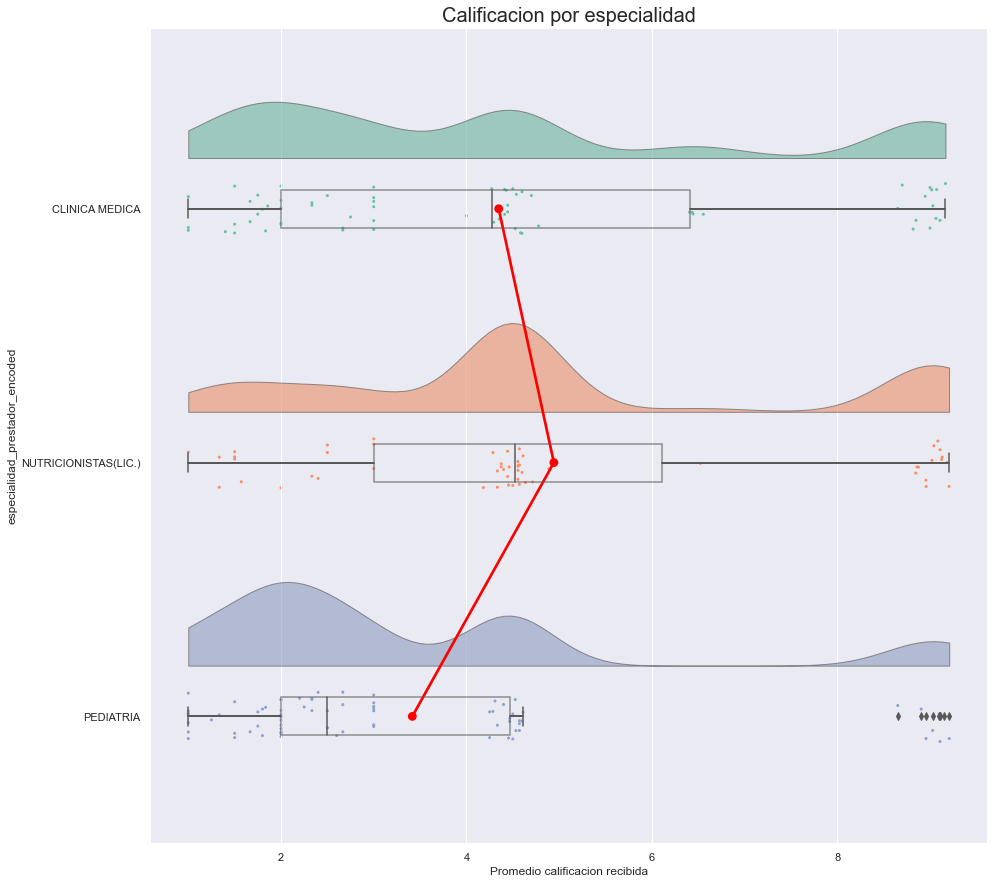

In [24]:
plt.figure(figsize=(15,15))
ax=pt.RainCloud(data=df,y='Promedio calificacion recibida',x=df.especialidad_prestador_encoded,orient='h',pointplot = True,alpha = .65)
plt.title("Calificacion por especialidad",fontsize=20)
plt.savefig('filename_2.png')
plt.show()

* El mayor valor de media de los promedios por especialidad la tiene los nutricionista por lo que estos fueron los que recibieron un mayor numero de calficaciones altas El mayor valor de mediana de los promedios por especialidad la tiene los nutricionista 


## Explorar consumos. Analizar su distribución
  1. Distribucion de los consumos para todas las especilidades
      *  Gran parte de los medicos brindo entre 0-5 consultas online 
      *  Se observa que en pocos medicos se concentran la mayor cantidad de consumos.
  2. Distribucion de los consumos por especilidad
      *  Los medicos clinicos son los mas demandados,seguido por los nutricionistas y los pediatras
  3. Relacion entre Consumos y la Calificacion recibida.
      *  Se observa que los medicos que obtienen los puntajes mas altos son los atienden a un gran numeros de paciente, por lo que para evitar que es consumo se concentre en unos medicos se deberia en prestar atencion en los medicos que realizan pocos consultas, y preguntarse al mismo al tiempo que tipo de relacion puede existir entre los pacientes atendidos por un  mismo medico.
  

<Figure size 1080x720 with 0 Axes>

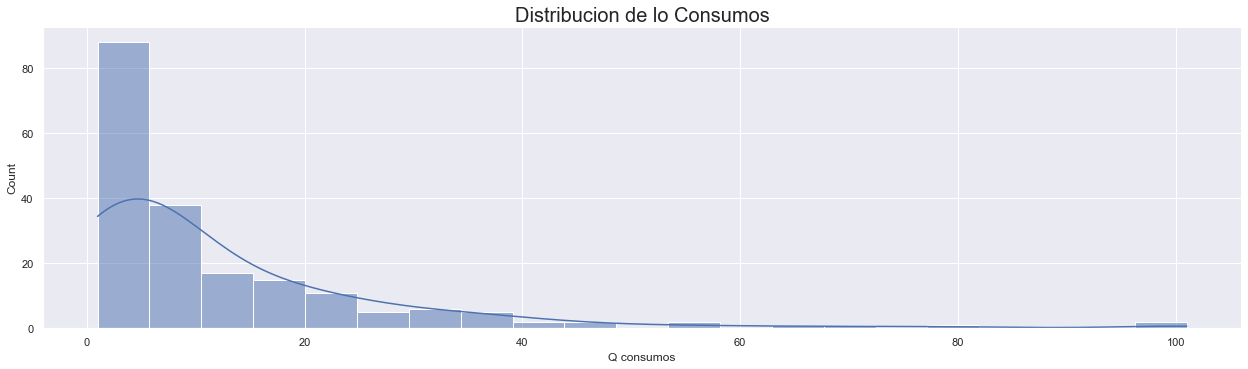

In [29]:
plt.figure(figsize=(15,10))
sns.displot(df, x="Q consumos", aspect=3.5, kde=True)
plt.title("Distribucion de lo Consumos",fontsize=20)
plt.savefig('filename_2.png')

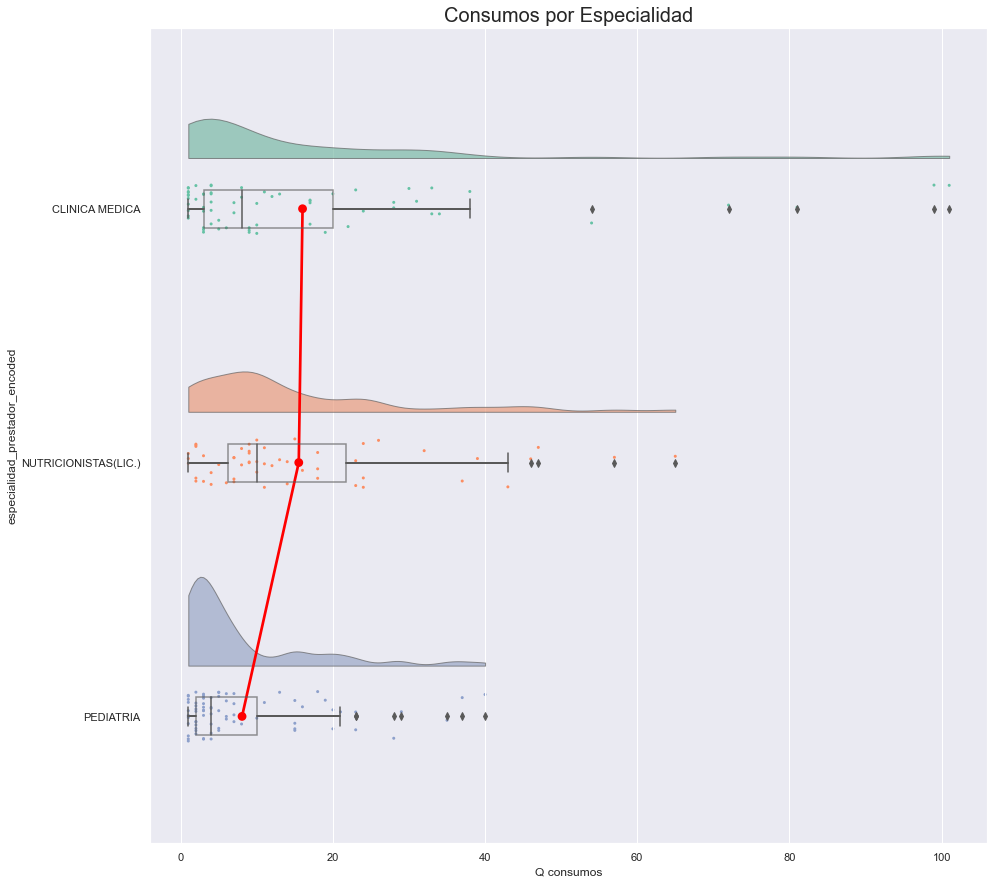

In [30]:
plt.figure(figsize=(15,15))

ax=pt.RainCloud(data=df,y='Q consumos',x=df.especialidad_prestador_encoded,orient='h',pointplot = True,alpha = .65)

plt.title("Consumos por Especialidad",fontsize=20)
plt.savefig('filename_2.png')
plt.show()

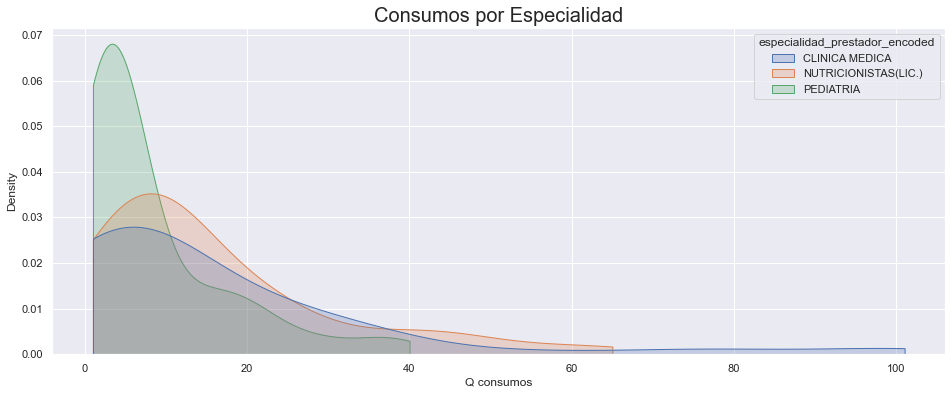

In [33]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=df, x="Q consumos", hue="especialidad_prestador_encoded", common_norm=False, shade=True,cut=0)
plt.title("Consumos por Especialidad",fontsize=20)
plt.savefig('filename_2.png')
plt.show()


* El mayor valor de la media de los consumos por especialidada la tiene los nutricionista/Clinicos:son las especilidades que mas atendieron consultas
  *  Q por Clinico : 16.015385
  *  Q por Nutricionistas : 15.518519
  *  Q por pediatria :8.064935 
* El mayor valor de mediana de los promedios por especialidada la tiene los nutricionista 

Text(0.5, 1.0, 'Consumos y Promedios')

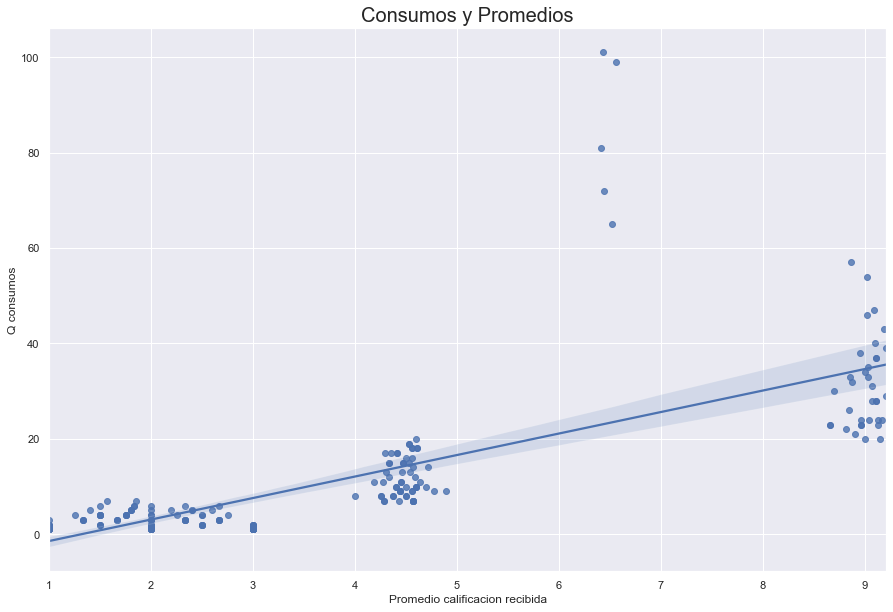

In [34]:
plt.figure(figsize=(15,10))
sns.regplot(x=df["Promedio calificacion recibida"], y=df["Q consumos"],data=df,dropna = True) 
plt.savefig('filename_2.png')
plt.title("Consumos y Promedios",fontsize=20)

In [ ]:
sns.pairplot(data=df,y_vars=df["Q consumos"] ,x_vars=df["Promedio calificacion recibida"],aspect=2, height=4)

In [ ]:
pd.DataFrame(df[df['especialidad_prestador_encoded']=='CLINICA MEDICA'].describe())

In [ ]:
pd.DataFrame(df[df['especialidad_prestador_encoded']=='NUTRICIONISTAS(LIC.)'].describe())

In [ ]:
pd.DataFrame(df[df['especialidad_prestador_encoded']=='PEDIATRIA'].describe())

g =sns.displot(df, x="Q consumos", row="especialidad_prestador_encoded", aspect=2.5, kde=True)
g.set_axis_labels("Consumos", "Frecuencia")
g.set_titles(row_template="Especialidad: {row_name}")
df_1 = df[df['especialidad_prestador_encoded']=='CLINICA MEDICA']
df_2 = df[df['especialidad_prestador_encoded']=='NUTRICIONISTAS(LIC.)']
df_3 = df[df['especialidad_prestador_encoded']=='PEDIATRA']
#for row_val, ax in g.axes_dict.items():
ax.axvline(40, color='orangered', linestyle='--', label='Media')

sns.catplot(data=df, y='Q consumos',
                x='especialidad_prestador_encoded', height=4, aspect=2)
plt.title('', size=16)
plt.xlabel('')
plt.ylabel('')
sns.despine()